## **Car Price Prediction**

<u>Problem Statement</u>

To develop a system to predict various car attributes like price, fuel
efficiency, and resale value based on input features such as make, model, year, and mileage.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Loading Dataset
df = pd.read_csv('D:\Machine Learning Bootcamp\---Courses & Internships---\CodexCue\CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


**Data Preprocessing**

In [3]:
df.shape

(4340, 8)

In [4]:
# Checking Dataset features
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [5]:
# Checking for dataset information
df.info

<bound method DataFrame.info of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission      

In [6]:
# Checking for dataset description
df.describe

<bound method NDFrame.describe of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission    

In [7]:
# Checking for null values
df.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [8]:
# Checking for null values counts
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
# Imputing numerical features
numerical_features = ['year', 'km_driven']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [10]:
numerical_features

['year', 'km_driven']

In [11]:
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [12]:
# Encoding categorical features
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [13]:
categorical_features

['fuel', 'seller_type', 'transmission', 'owner']

In [14]:
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [15]:
# Combining categorical and numerical features 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [16]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['year', 'km_driven']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['fuel', 'seller_type', 'transmission',
                                  'owner'])])

In [17]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


**Feature Engineering**

In [18]:
# Extracting car brand from the name
df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])
categorical_features.append('brand')

In [19]:
# Updating the preprocessor to include the new feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [20]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['year', 'km_driven']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['fuel', 'seller_type', 'transmission',
                                  'owner', 'brand'])])

**Exploratory Data Analysis**

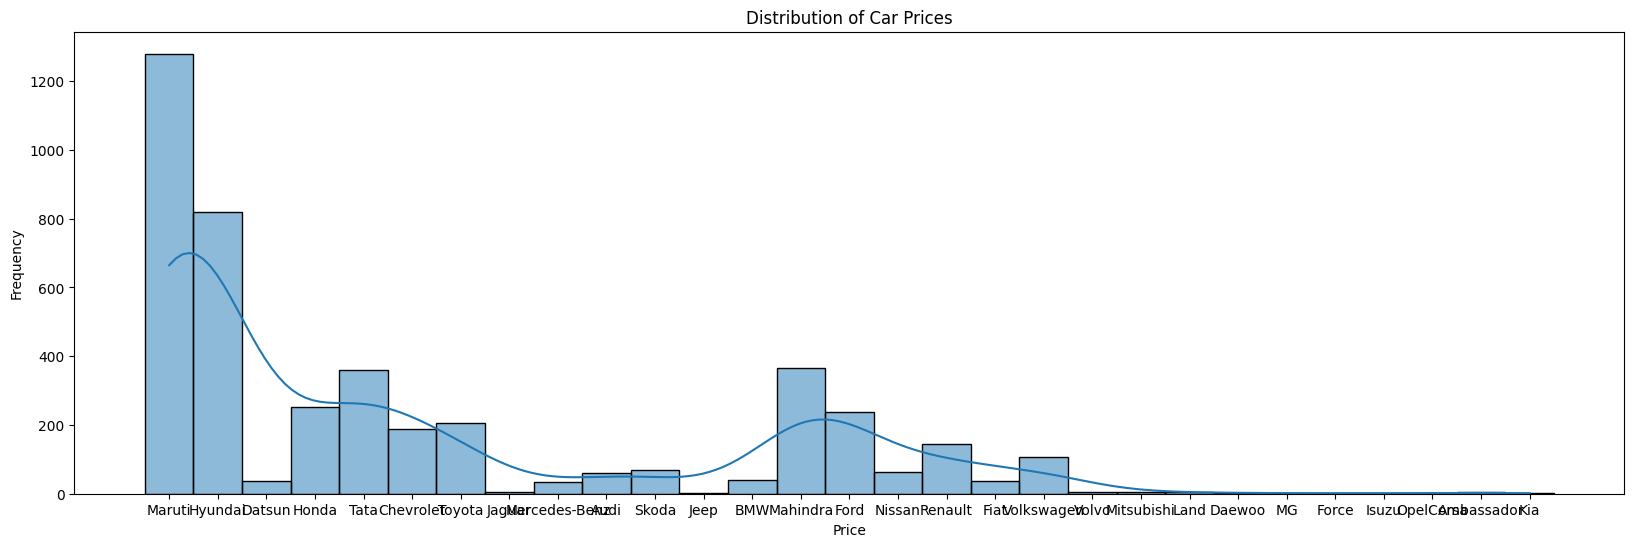

In [21]:
# Plotting the distribution of car prices with brands
plt.figure(figsize=(20, 6))
sns.histplot(df['brand'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

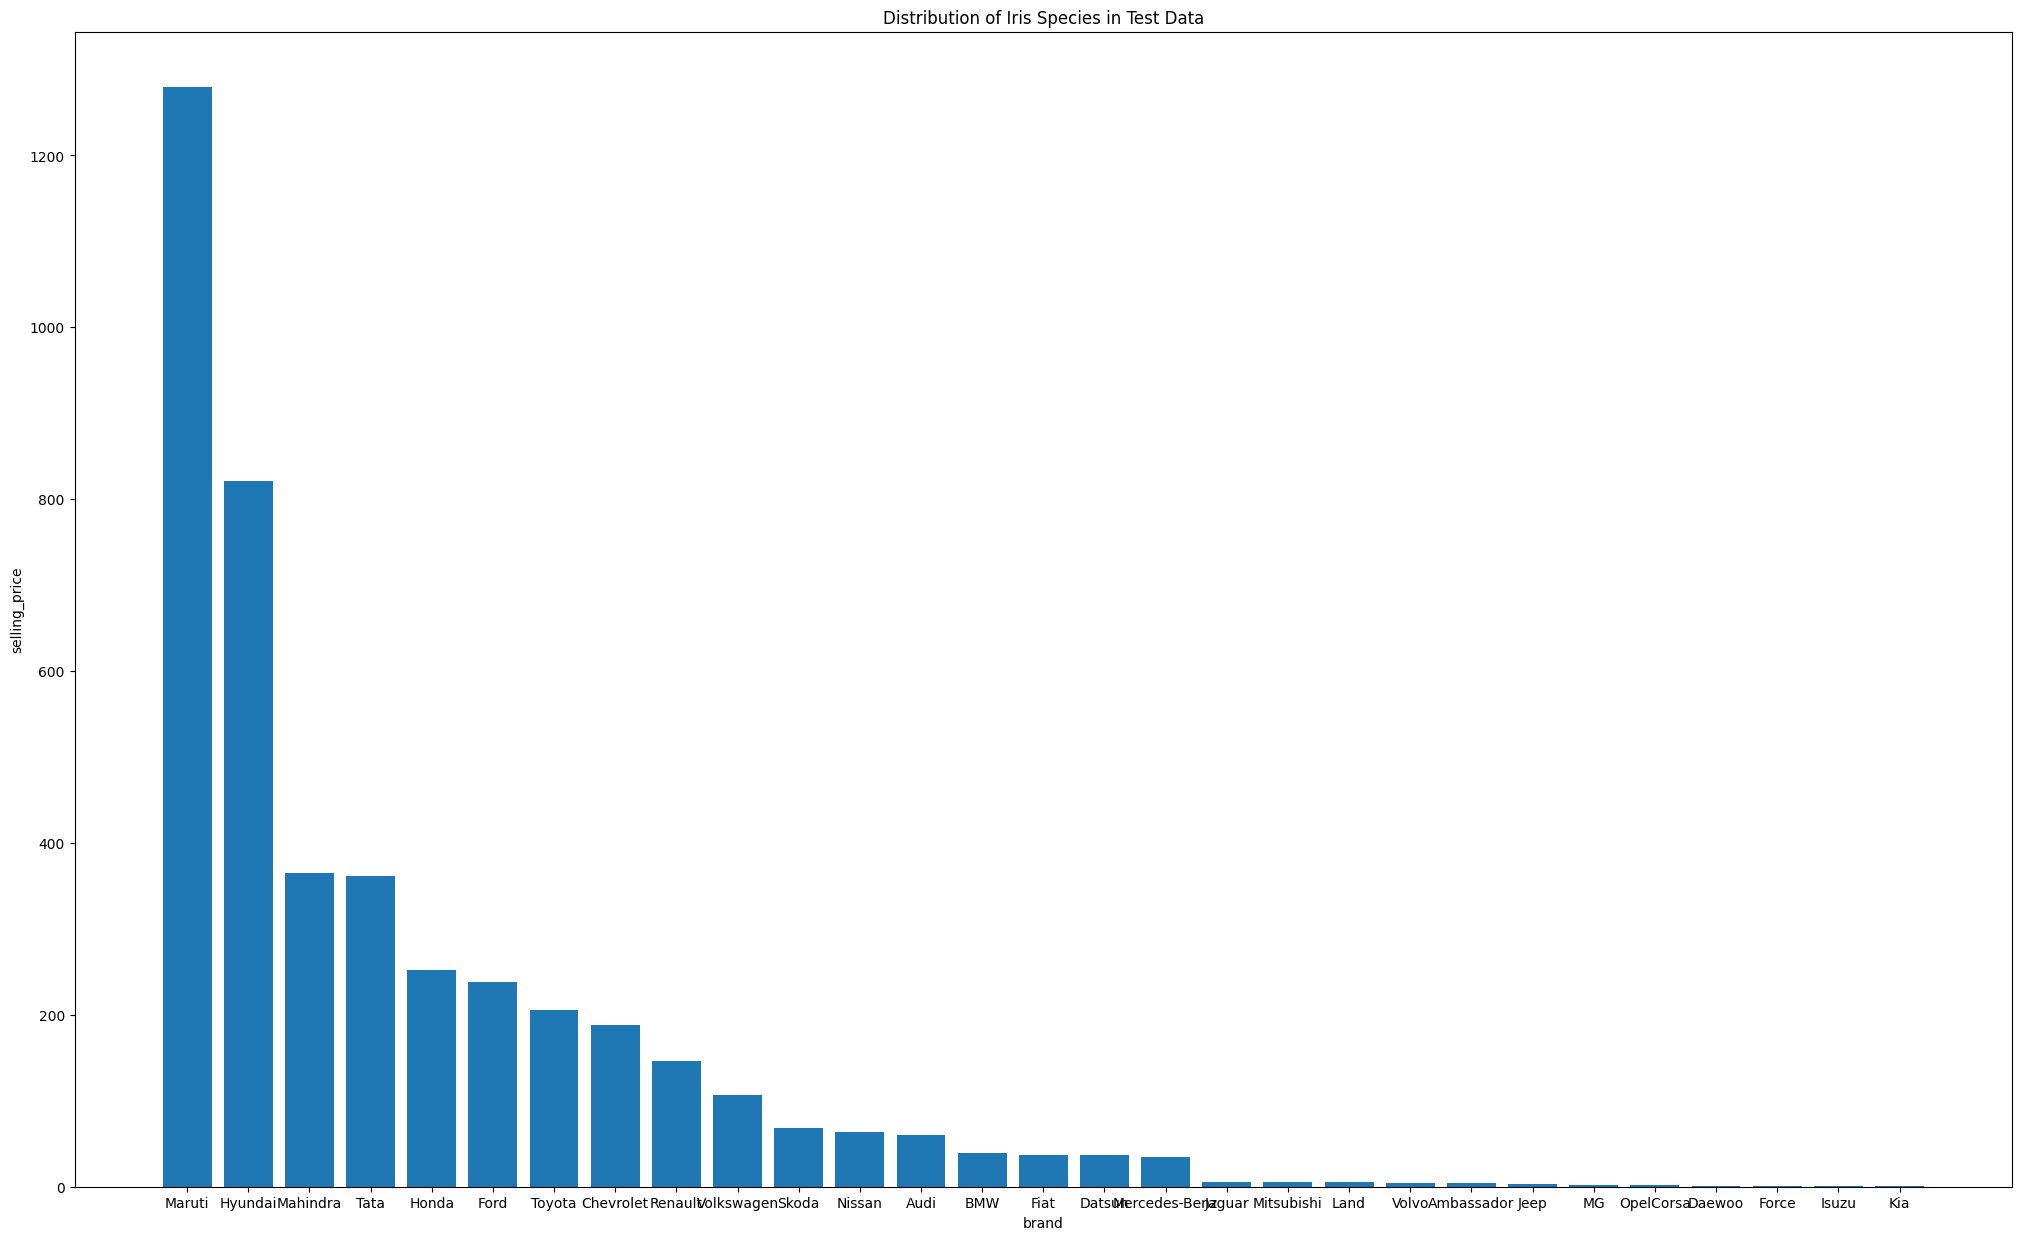

In [22]:
brand = df['brand'].value_counts()

# Creating a bar chart to visualize the brands distribution
plt.figure(figsize=(25, 15))
plt.bar(brand.index, brand.values)
plt.xlabel("brand")
plt.ylabel("selling_price")
plt.title("Distribution of Iris Species in Test Data")
plt.show()

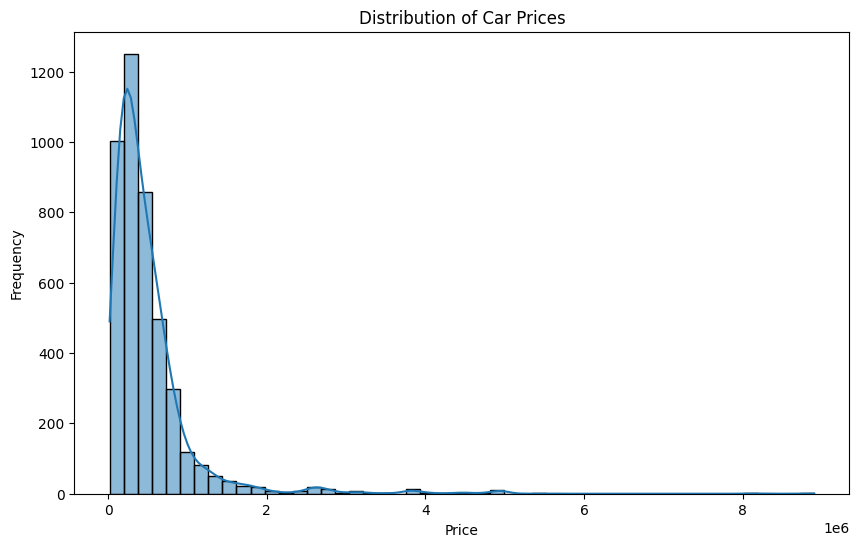

In [23]:
# Plotting the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [24]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

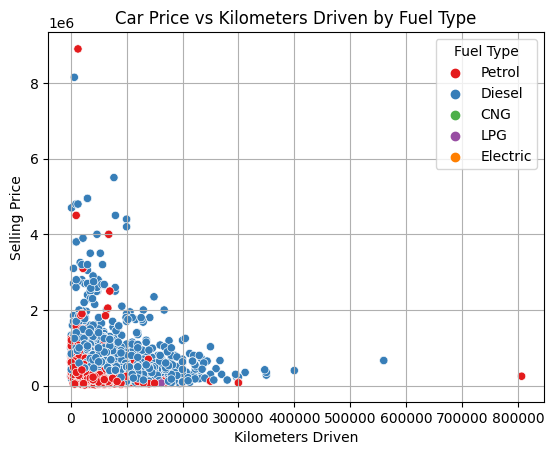

In [25]:
# Choosing two features for the scatter plot
x = 'km_driven'
y = 'selling_price'

# Creating a scatter plot 
sns.scatterplot(
    x='km_driven',
    y='selling_price',
    hue = 'fuel',
    data=df,
    palette="Set1"
)

# Adding labels and title
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title("Car Price vs Kilometers Driven by Fuel Type")
plt.legend(title="Fuel Type") 
plt.grid(True) 
plt.show()

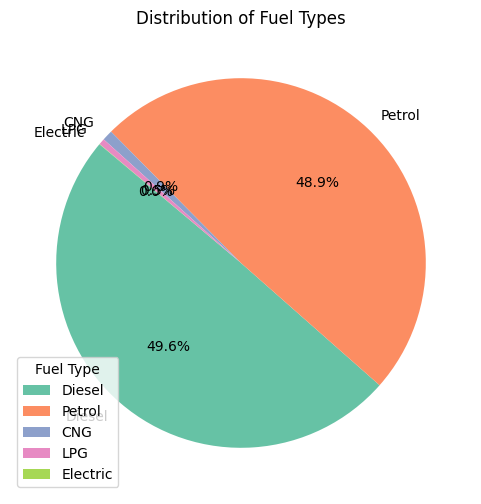

In [26]:
# Counting the number of each fuel type
fuel_counts = df['fuel'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(fuel_counts)))
plt.legend(title="Fuel Type") 
plt.title('Distribution of Fuel Types')
plt.show()

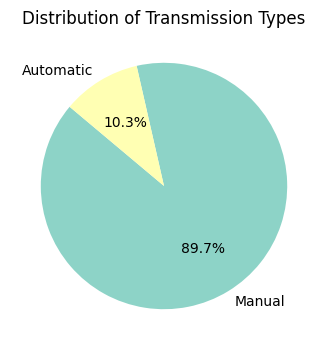

In [27]:
# Plotting the number of each transmission type
transmission_counts = df['transmission'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(transmission_counts)))
plt.title('Distribution of Transmission Types')
plt.show()

In [28]:
# Converting Categorical values into numerical
label_encoder = {}
for column in ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoder[column] = le

In [29]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,775,2007,60000,70000,4,1,1,0,18
1,1041,2007,135000,50000,4,1,1,0,18
2,505,2012,600000,100000,1,1,1,0,10
3,118,2017,250000,46000,4,1,1,0,5
4,279,2014,450000,141000,1,1,1,2,9
...,...,...,...,...,...,...,...,...,...
4335,602,2014,409999,80000,1,1,1,2,10
4336,601,2014,409999,80000,1,1,1,2,10
4337,777,2009,110000,83000,4,1,1,2,18
4338,381,2016,865000,90000,1,1,1,0,10


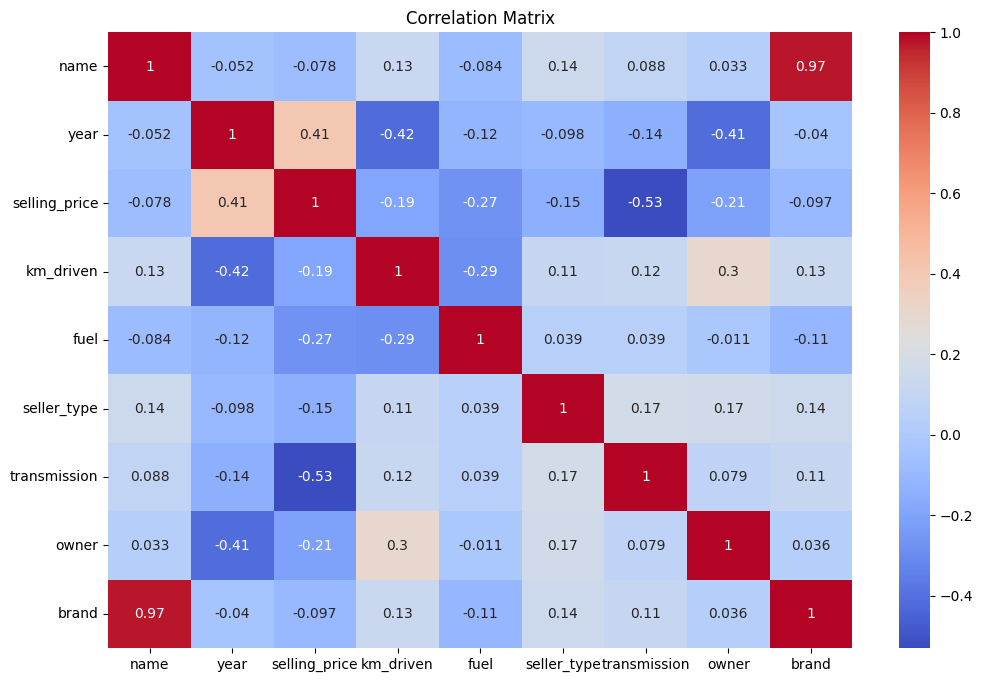

In [30]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [31]:
# Z-score method for outlier detection
from scipy import stats
df= stats.zscore(df)
outliers = df[df.abs() > 3]

print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 4340


In [32]:
# List of numerical columns to check for outliers
numerical_columns = ['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'brand']

# Dictionary to store outlier information
outlier_info = {}

In [33]:
# Check for outliers in each numerical column
def detect_outliers(df):
    for column in numerical_columns:
        outliers = detect_outliers(df, column)
        outlier_count = outliers.shape[0]
        if outlier_count > 0:
            outlier_info[column] = outlier_count

# Display columns with outliers and their count
if outlier_info:
    print("Outliers detected in the following columns:")
    for column, count in outlier_info.items():
        print(f"{column}: {count} outliers")
else:
    print("No outliers detected in any numerical column.")


No outliers detected in any numerical column.


In [34]:
# Function to detect outliers using IQR method
def detect_outliers(df):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
print(outliers)

      name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0      NaN   NaN            NaN        NaN   NaN          NaN           NaN   
1      NaN   NaN            NaN        NaN   NaN          NaN           NaN   
2      NaN   NaN            NaN        NaN   NaN          NaN           NaN   
3      NaN   NaN            NaN        NaN   NaN          NaN           NaN   
4      NaN   NaN            NaN        NaN   NaN          NaN           NaN   
...    ...   ...            ...        ...   ...          ...           ...   
4335   NaN   NaN            NaN        NaN   NaN          NaN           NaN   
4336   NaN   NaN            NaN        NaN   NaN          NaN           NaN   
4337   NaN   NaN            NaN        NaN   NaN          NaN           NaN   
4338   NaN   NaN            NaN        NaN   NaN          NaN           NaN   
4339   NaN   NaN            NaN        NaN   NaN          NaN           NaN   

      owner  brand  
0       NaN    NaN  
1       N

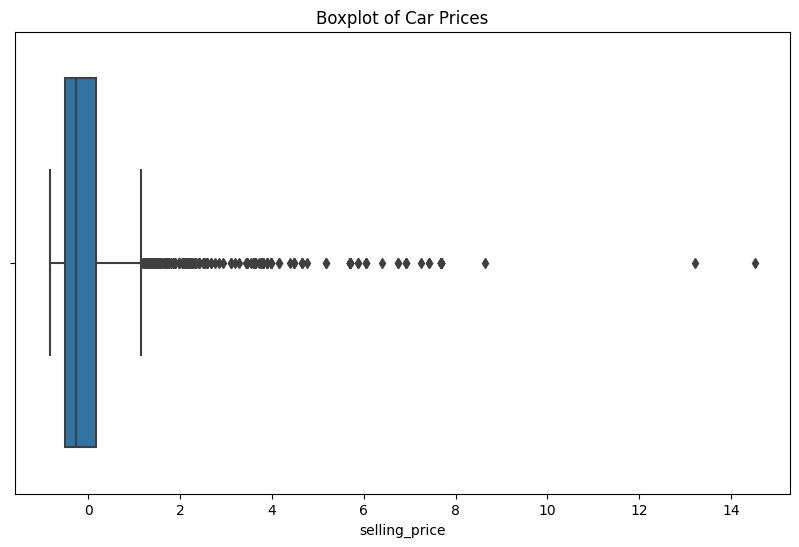

In [35]:
# Outlier Detection and Handling
# Plotting boxplots to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot of Car Prices')
plt.show()

In [36]:
# Function to remove outliers using IQR method
def remove_outliers(df):
    df_cleaned = df.copy()
    for column in df_cleaned.select_dtypes(include=[np.number]).columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned

In [37]:
# Function to check and print outlier information
def check_and_print_outliers(df, message):
    outliers = detect_outliers(df)
    print(message)
    total_outliers = 0
    for column, indices in outliers.items():
        outlier_count = len(indices)
        total_outliers += outlier_count
        print(f"{column}: {outlier_count} outliers")
    print("Total outliers detected: {total_outliers}\n")
    return total_outliers

In [38]:
# Remove outliers from the dataset
df_cleaned = remove_outliers(df)
print(df_cleaned)

          name      year  selling_price  km_driven      fuel  seller_type  \
0     0.058522 -1.445074      -0.767746   0.081139  1.014993     0.448192   
1     0.723520 -1.445074      -0.638096  -0.347689  1.014993     0.448192   
2    -0.616477 -0.258795       0.165731   0.724381 -0.974051     0.448192   
3    -1.583975  0.927485      -0.439300  -0.433455  1.014993     0.448192   
4    -1.181476  0.215717      -0.093568   1.603479 -0.974051     0.448192   
...        ...       ...            ...        ...       ...          ...   
4335 -0.373977  0.215717      -0.162716   0.295553 -0.974051     0.448192   
4336 -0.376477  0.215717      -0.162716   0.295553 -0.974051     0.448192   
4337  0.063522 -0.970563      -0.681313   0.359877  1.014993     0.448192   
4338 -0.926476  0.690229       0.623827   0.509967 -0.974051     0.448192   
4339  1.006020  0.690229      -0.482517  -0.562103  1.014993     0.448192   

      transmission     owner     brand  
0         0.339276 -0.665079  0.35

In [39]:
# Detect outliers before cleaning
total_outliers_before = check_and_print_outliers(df, "Outliers before cleaning:")

# Remove outliers from the dataset
df_cleaned = remove_outliers(df)

# Detect outliers after cleaning
total_outliers_after = check_and_print_outliers(df_cleaned, "Outliers after cleaning:")

Outliers before cleaning:
name: 0 outliers
year: 0 outliers
selling_price: 0 outliers
km_driven: 0 outliers
fuel: 0 outliers
seller_type: 0 outliers
transmission: 0 outliers
owner: 0 outliers
brand: 0 outliers
Total outliers detected: {total_outliers}

Outliers after cleaning:
name: 0 outliers
year: 0 outliers
selling_price: 0 outliers
km_driven: 0 outliers
fuel: 0 outliers
seller_type: 0 outliers
transmission: 0 outliers
owner: 0 outliers
brand: 0 outliers
Total outliers detected: {total_outliers}



In [40]:
# Detect outliers after cleaning
total_outliers_after = check_and_print_outliers(df_cleaned, "Outliers after cleaning:")

# Calculate the number of removed outliers
removed_outliers_count = total_outliers_before - total_outliers_after
print(f"Total outliers removed: {removed_outliers_count}")

Outliers after cleaning:
name: 0 outliers
year: 0 outliers
selling_price: 0 outliers
km_driven: 0 outliers
fuel: 0 outliers
seller_type: 0 outliers
transmission: 0 outliers
owner: 0 outliers
brand: 0 outliers
Total outliers detected: {total_outliers}

Total outliers removed: 0


**Model Building**

In [41]:
# Splitting data into train and test sets
X = df.drop(columns=['name', 'selling_price'])
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
print(y_test)

3978   -0.586237
1448   -0.439300
2664   -0.664026
17     -0.093568
1634    0.390458
          ...   
3468   -0.646740
3164   -0.266434
416    -0.612166
1616    0.252165
2480    0.122515
Name: selling_price, Length: 868, dtype: float64


In [43]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [44]:
# Create a pipeline that combines preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
print(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'km_driven']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['fuel', '

In [45]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'km_driven']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner',
                                                   'brand'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [46]:
# Make predictions
y_pred = pipeline.predict(X_test)
print(y_pred)

[-6.08531922e-01 -2.52506776e-01 -6.49084893e-01 -1.32268249e-01
  1.16524296e+00 -4.98634372e-01  5.78456264e-02 -6.74919171e-01
 -1.27311708e-01 -2.88681910e-01  1.76749535e-01  8.81639530e-01
 -8.66647390e-02 -6.35244072e-01  2.68431286e-01 -3.73013247e-01
  3.01517669e-01  1.53197950e+00 -6.85743264e-01  4.72689990e-01
  5.89872865e-02  1.06488515e+00 -3.44617400e-01  7.53336147e-01
 -4.81921835e-01  1.89218230e-01  3.77357161e-01 -4.63072216e-01
 -5.88735814e-02  3.30229701e-01 -5.21002562e-01  3.10092040e-01
 -7.94965538e-02  5.10178829e-01  7.48619180e-02 -4.78221778e-01
  5.52169548e-01 -2.33912959e-01 -6.72500653e-01 -1.31287456e-01
  6.28242249e-02 -2.55889192e-01  3.49607021e-01 -2.08575712e-01
 -5.98511239e-01 -5.09829643e-01 -3.73697526e-01 -6.26075777e-02
  4.50052543e-01 -1.81254226e-01 -5.65717286e-01 -5.34135348e-01
  4.42317398e-01 -5.62277248e-01  1.16925578e-01  3.40239906e-01
  2.38999168e-01 -4.50795887e-01 -4.51203868e-01 -1.91997861e-01
 -4.83726846e-01 -5.13020

**Model Evaluation**

In [47]:
# For Evaluation Metrics

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.19846295113493273


In [48]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.23172130205402575


In [49]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:',rmse)


Root Mean Squared Error: 0.4813743886560914


In [50]:
# R-Squared Score
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

R^2 Score: 0.74590066156669


In [51]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,0.058522,-1.445074,-0.767746,0.081139,1.014993,0.448192,0.339276,-0.665079,0.358173
1,0.723520,-1.445074,-0.638096,-0.347689,1.014993,0.448192,0.339276,-0.665079,0.358173
2,-0.616477,-0.258795,0.165731,0.724381,-0.974051,0.448192,0.339276,-0.665079,-0.816674
3,-1.583975,0.927485,-0.439300,-0.433455,1.014993,0.448192,0.339276,-0.665079,-1.550953
4,-1.181476,0.215717,-0.093568,1.603479,-0.974051,0.448192,0.339276,0.956519,-0.963530
...,...,...,...,...,...,...,...,...,...
4335,-0.373977,0.215717,-0.162716,0.295553,-0.974051,0.448192,0.339276,0.956519,-0.816674
4336,-0.376477,0.215717,-0.162716,0.295553,-0.974051,0.448192,0.339276,0.956519,-0.816674
4337,0.063522,-0.970563,-0.681313,0.359877,1.014993,0.448192,0.339276,0.956519,0.358173
4338,-0.926476,0.690229,0.623827,0.509967,-0.974051,0.448192,0.339276,-0.665079,-0.816674
